In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("https://github.com/christianw/applied-ux/raw/main/data/reddit-airpods.csv.xz", low_memory=False)

In [4]:
len(df)

487340

In [5]:
df.dtypes

id               object
kind             object
title            object
link_id          object
parent_id        object
name             object
ups               int64
downs             int64
score             int64
author           object
num_comments    float64
created_utc      object
permalink        object
url              object
selftext         object
body             object
flair            object
level           float64
top_parent      float64
dtype: object

In [7]:
df["kind"].value_counts()

t1    413389
t3     73951
Name: kind, dtype: int64

In [9]:
df[df["kind"] == "t3"]

,id,kind,title,link_id,parent_id,name,ups,downs,score,author,num_comments,created_utc,permalink,url,selftext,body,flair,level,top_parent
0,t3_b1qm9t,t3,airpod meetup,NaN,NaN,t3_b1qm9t,0,0,0,harrisisadonkey,0.0,2019-03-16 10:23:37.000000,/r/airpods/comments/b1qm9t/airpod_meetup/,https://www.reddit.com/r/airpods/comments/b1qm9t/airpod_meetup/,anyone thinking of going with wired headphones and acting normal. Or better yet walk in with either normal apple headphones with the wires cut off or fake ass airpods,NaN,NaN,NaN,NaN
1,t3_5jwrl6,t3,"How to pair/ Unpair Airpods to iPhone, iPad, Apple Watch and Mac",NaN,NaN,t3_5jwrl6,1,0,1,iPhonicworld,0.0,2016-12-23 12:59:00.000000,/r/airpods/comments/5jwrl6/how_to_pair_unpair_airpods_to_iphone_ipad_apple/,https://www.howtoisolve.com/pair-unpair-airpods-iphone-ipad-apple-watch-mac/#AirpodstoApple,NaN,NaN,NaN,NaN,NaN
2,t3_5j4v7c,t3,AirPods First Impression with Videos,NaN,NaN,t3_5j4v7c,1,0,1,[deleted],0.0,2016-12-19 07:07:10.000000,/r/airpods/comments/5j4v7c/airpods_first_impression_with_videos/,NaN,[deleted],NaN,NaN,NaN,NaN
3,t3_5j5ne4,t3,Got my New Apple Airpod..,NaN,NaN,t3_5j5ne4,14,0,14,marvinrohan,0.0,2016-12-19 11:04:25.000000,/r/airpods/comments/5j5ne4/got_my_new_apple_airpod/,https://i.reddituploads.com/2421deb9fcdc4d0f88edb7db02b25a9b?fit=max&amp;h=1536&amp;w=1536&amp;s=ab55e1201dcf263bf8821eaaa1cf10e0,NaN,NaN,NaN,NaN,NaN
4,t3_5jzk8r,t3,Airpods tested to be haircut compatible!,NaN,NaN,t3_5jzk8r,5,0,5,Imacatdoincatstuff,3.0,2016-12-23 22:40:10.000000,/r/airpods/comments/5jzk8r/airpods_tested_to_be_haircut_compatible/,https://www.reddit.com/r/airpods/comments/5jzk8r/airpods_tested_to_be_haircut_compatible/,"Yup got a haircut today wearing the pods the whole time. No issues with hindering the barber, including trimming along the outside of the ear. Barber says they made me a more patient customer.",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487250,t3_11wlbcw,t3,How long has this been a thing?? No more deafening tones on my AirPods Pro!,NaN,NaN,t3_11wlbcw,258,0,258,codex_41,32.0,2023-03-20 16:10:51.000000,/r/airpods/comments/11wlbcw/how_long_has_this_been_a_thing_no_more_deafening/,https://i.imgur.com/S2cx0Xj.jpg,NaN,NaN,NaN,NaN,NaN
487282,t3_11zbq25,t3,airpod gen 3 glitching,NaN,NaN,t3_11zbq25,2,0,2,Spillity,0.0,2023-03-23 07:47:53.000000,/r/airpods/comments/11zbq25/airpod_gen_3_glitching/,https://www.reddit.com/r/airpods/comments/11zbq25/airpod_gen_3_glitching/,"Hi, I have the AirPods gen 3 and whenever I use them on my windows laptop with the wifi on the audio keeps cutting out, the issue stops when I turn the wifi off. Any fixes for this? Can I buy an external Bluetooth dongle to fix this?",NaN,NaN,NaN,NaN
487283,t3_11k6cyl,t3,Are these airpods really from japan?,NaN,NaN,t3_11k6cyl,104,0,104,DesignerBeing4713,42.0,2023-03-06 18:37:37.000000,/r/airpods/comments/11k6cyl/are_these_airpods_really_from_japan/,https://i.redd.it/nat4gprz47ma1.jpg,NaN,NaN,NaN,NaN,NaN
487330,t3_11g1gvs,t3,Big Booty Mature,NaN,NaN,t3_11g1gvs,1,0,1,Haunting-Alarm-8240,0.0,2023-03-02 13:23:59.000000,/r/airpods/comments/11g1gvs/big_booty_mature/,https://big-booty.mature.akterja.com/,NaN,NaN,NaN,NaN,NaN


In [12]:
df_text = df[(~df["selftext"].isna()) | (~df["body"].isna())].copy()

In [13]:
len(df_text)

470655

In [19]:
df_text["author"].nunique()

95701

In [20]:
df_text["author"].value_counts()

[deleted]              65436
toastyhoodie            2193
Dragon-Rider-03         1558
kmkmrod                 1102
scottgetsittogether      823
                       ...  
DarklySpaced               1
savagenibbster69           1
getlegz                    1
Metallbran88               1
im0wen                     1
Name: author, Length: 95701, dtype: int64

In [23]:
df_text["created_utc"] = pd.to_datetime(df_text["created_utc"])

<Axes: xlabel='created_utc'>

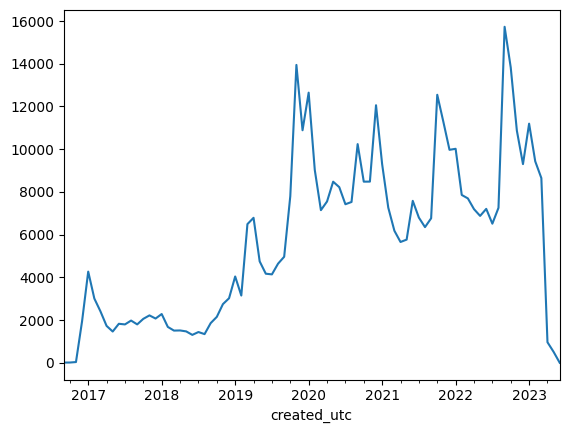

In [24]:
df_text.set_index("created_utc").resample("M").count()["id"].plot()

In [25]:
df_text["text"] = df_text["selftext"].fillna("") + df_text["body"].fillna("")

In [27]:
df_text["text"]

0         anyone thinking of going with wired headphones...
2                                                 [deleted]
4         Yup got a haircut today wearing the pods the w...
5         That's really odd to wear headphones during a ...
6         Wonder what he said about you when you weren't...
                                ...                        
487335                                                 True
487336    What exactly needs to be done here and where o...
487337    I just clean the inside part, where the wax is...
487338                            Your ear is the problem 🗿
487339                  Old firmware issue, waiting for fix
Name: text, Length: 470655, dtype: object

In [29]:
df_not_delete = df_text[df_text["text"] != "[deleted]"].copy()

In [30]:
stopwords = set(pd.read_csv("https://github.com/christianw/applied-ux/raw/main/week03/stopwords.txt", header=None)[0].values)

In [32]:
from collections import Counter

In [40]:
%%time
words = Counter([str(w) for t in df_not_delete["text"] 
                       for w in t.lower().split(" ")
                           if w not in stopwords])
words.most_common(20)

CPU times: user 2.03 s, sys: 16.4 ms, total: 2.05 s
Wall time: 2.05 s


[('airpods', 105187),
 ('', 70108),
 ('apple', 51009),
 ('case', 43698),
 ('it’s', 35851),
 ('will', 32023),
 ('pro', 26571),
 ('i’m', 25923),
 ('don’t', 24388),
 ('sound', 24078),
 ('airpod', 23341),
 ('good', 18112),
 ('ear', 18067),
 ('gen', 17830),
 ('work', 17456),
 ('mine', 17094),
 ('buy', 17085),
 ('2', 17076),
 ('[removed]', 16658),
 ('pros', 16548)]